In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [7]:
raw_data = pd.read_csv('RawData.txt',header = None)

"""The text file contains three columns: tweet_id, label, and step
(see sample data on the right). The label field contains one of 
three values {0, 1, -1} where: 0 is for ham (or non-spam tweet), 1 is for
spam tweet, and -1 is for those tweets that can not be labeled as spam or ham even after manual inspection."""

raw_data.rename(columns = {0:'Tweets_ID',1:'Detection',2:"Algo_Used"},inplace = True)
raw_data.head()


,Tweets_ID,Detection,Algo_Used
0,329850888376156160,0,6
1,329850889626087424,0,5
2,329850889856761856,0,5
3,329850889890308096,0,6
4,329850889949048833,0,6


In [42]:
# To Extract the tweets we only need Tweets_ID, which will be given to hydrator(Converts tweets_id into tweets) which 
# will be later used for our analysis
Tweets_ID = raw_data.loc[0:100000,['Tweets_ID','Detection']]
Tweets_ID.head()

,Tweets_ID,Detection
0,329850888376156160,0
1,329850889626087424,0
2,329850889856761856,0
3,329850889890308096,0
4,329850889949048833,0


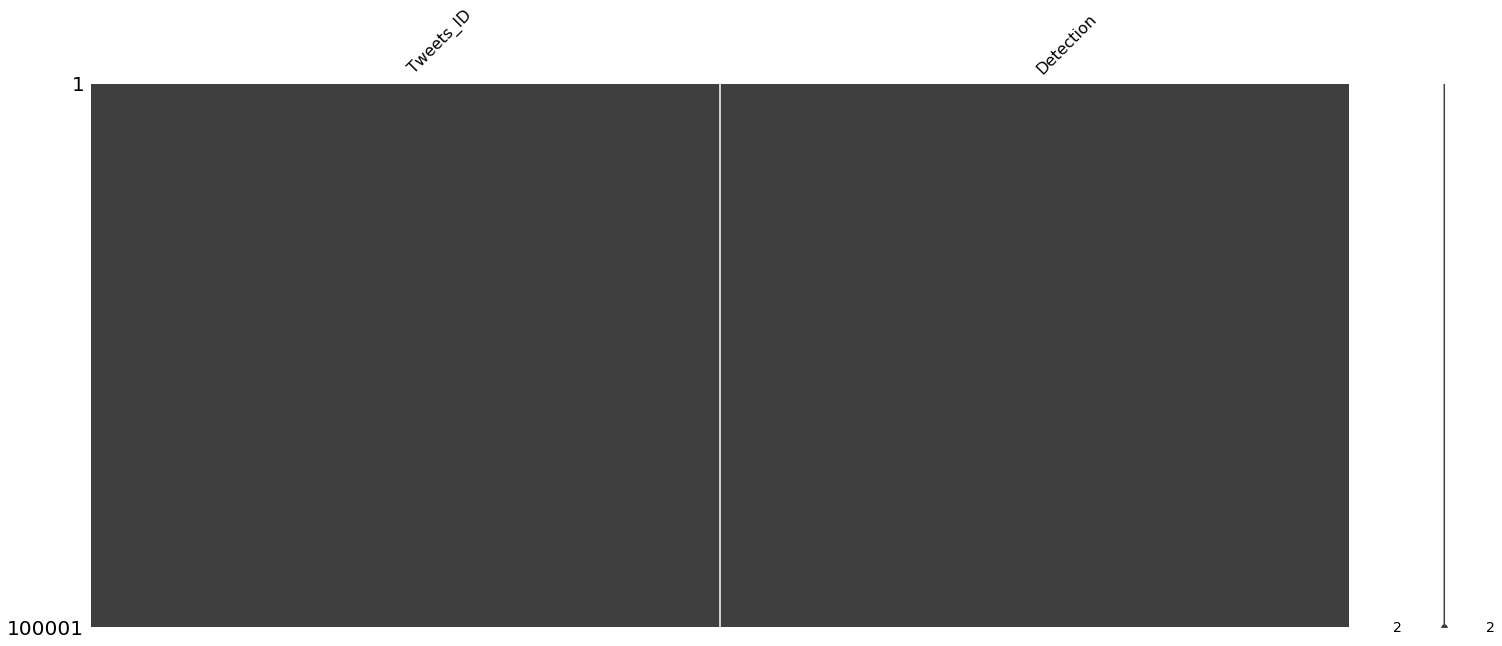

In [43]:
# Any missing value in our dataset
msno.matrix(Tweets_ID);  #no missing values

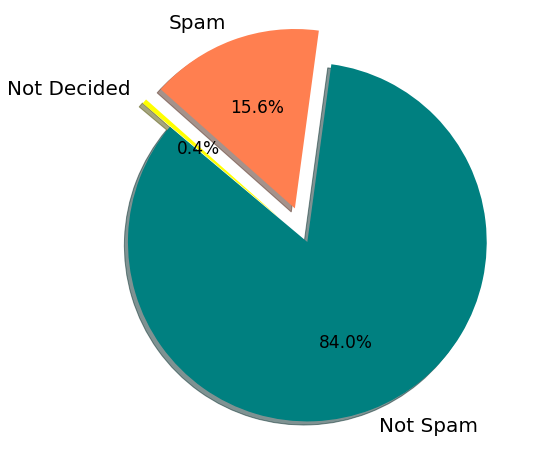

In [44]:
c = Tweets_ID['Detection'].value_counts(normalize = True)*100

activities = ['Not Spam','Spam','Not Decided']
explode = (0,0.2,0.2)
fig,ax = plt.subplots(figsize=(8,8))
patches,texts,autotxts = ax.pie(c,explode=explode, labels=activities,autopct='%1.1f%%', shadow=True, startangle=140,
                                colors = ['teal','coral','yellow'])
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
texts[2].set_fontsize(20)
autotxts[0].set_fontsize(17)
autotxts[1].set_fontsize(17)
autotxts[2].set_fontsize(17)

plt.axis('equal')
plt.show()

In [47]:
# Saving the Tweets_id into a new file which will be later used by hydrator
Tweets_ID = Tweets_ID[['Tweets_ID']]
Tweets_ID.to_csv("Tweets_ID.txt",header = None,index=False)